In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow_addons.callbacks import TQDMProgressBar
from scipy.special import softmax

from vae import VAE, compute_mixture

2023-10-17 01:26:36.330156: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-17 01:26:36.330201: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-17 01:26:36.330220: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-17 01:26:36.334982: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/bjlkeng/devel/sandbox/bitsback/.venv/lib/pyt

In [2]:
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

# Scale to be between [-1, 1]
x_train = (x_train.astype('float32') - 127.5) / 127.5
x_test = (x_test.astype('float32') - 127.5) / 127.5

print(x_train.shape)

mnist_digits = x_train
mnist_digits = np.expand_dims(mnist_digits, -1)

mnist_digits_test = x_test
mnist_digits_test = np.expand_dims(mnist_digits_test, -1)

(60000, 28, 28)


[-1.         -1.         -1.         -0.3647059   0.88235295  0.9843137
  0.9843137  -0.06666667 -0.8039216  -1.        ]


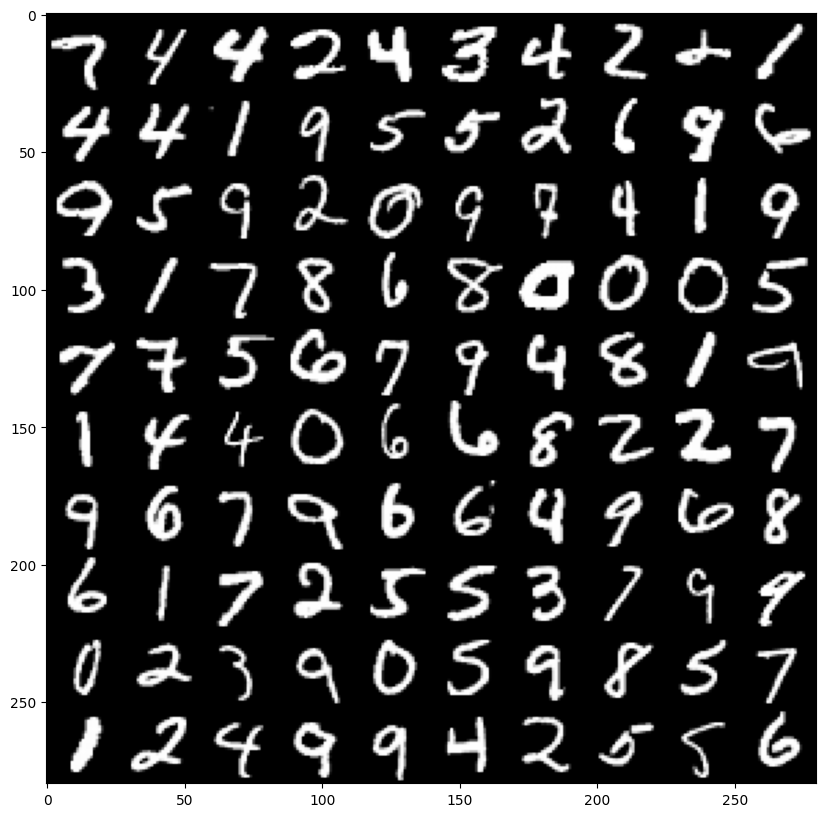

In [3]:
def display_digits(X, digit_size=28, n=10):
    figure = np.zeros((digit_size * n, digit_size * n))
    
    for i in range(n):
        for j in range(n):
            index = np.random.randint(0, X.shape[0])
            digit = X[index].reshape(digit_size, digit_size)
            
            x = i * digit_size
            y = j * digit_size
            figure[x:x + digit_size, y:y + digit_size] = digit
    
    plt.figure(figsize=(max(n, 3), max(n, 3)))
    plt.imshow(figure, cmap='Greys_r')
    plt.show()
    

print(mnist_digits[0, 14, 10:20].reshape(10))
display_digits(mnist_digits)

In [4]:
n_components = 3
vae = VAE(latent_dim=50, mixture_components=n_components)
vae.encoder.summary()
vae.decoder.summary()
vae.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001))

2023-10-17 01:26:38.463402: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-17 01:26:38.466276: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-17 01:26:38.466304: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-17 01:26:38.469131: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-17 01:26:38.469159: I tensorflow/compile

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 res1c_branch2a (Conv2D)     (None, 28, 28, 64)           128       ['input_1[0][0]']             
                                                                                                  
 bn1c_branch2a (BatchNormal  (None, 28, 28, 64)           256       ['res1c_branch2a[0][0]']      
 ization)                                                                                         
                                                                                                  
 activation_6 (Activation)   (None, 28, 28, 64)           0         ['bn1c_branch2a[0][0]'] 

In [5]:
tf.random.set_seed(42)
history = vae.fit(mnist_digits, epochs=10, batch_size=128,
                  validation_data=(mnist_digits_test, None),
                  callbacks=[TQDMProgressBar()], verbose=0)

/home/bjlkeng/devel/sandbox/bitsback/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Training:   0%|           0/10 ETA: ?s,  ?epochs/s

Epoch 1/10


2023-10-17 01:26:43.146713: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape ingradient_tape/SelectV2_4-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-10-17 01:26:44.305159: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-10-17 01:26:44.840115: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-10-17 01:26:44.926841: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-10-17 01:26:46.658309: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fed88fb78f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-17 01:26:46.658343: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8

Epoch 2/10


469/469██████████ ETA: 00:00s - loss: 760.8599 - reconstruction_loss: 752.1216 - kl_loss: 2.9127 - val_loss: 758.0352 - val_reconstruction_loss: 755.0697 - val_kl_loss: 2.9655
Training:  20%|██         2/10 ETA: 02:19s,  17.41s/epochs

Epoch 3/10


469/469██████████ ETA: 00:00s - loss: 698.3655 - reconstruction_loss: 689.3983 - kl_loss: 2.9891 - val_loss: 687.6051 - val_reconstruction_loss: 684.4651 - val_kl_loss: 3.1400
Training:  30%|███        3/10 ETA: 01:47s,  15.36s/epochs

Epoch 4/10


469/469██████████ ETA: 00:00s - loss: 705.7512 - reconstruction_loss: 696.0562 - kl_loss: 3.2317 - val_loss: 780.6155 - val_reconstruction_loss: 777.2942 - val_kl_loss: 3.3213
Training:  40%|████       4/10 ETA: 01:25s,  14.25s/epochs

Epoch 5/10


469/469██████████ ETA: 00:00s - loss: 659.6101 - reconstruction_loss: 649.8350 - kl_loss: 3.2584 - val_loss: 679.3960 - val_reconstruction_loss: 675.9600 - val_kl_loss: 3.4360
Training:  50%|█████      5/10 ETA: 01:07s,  13.58s/epochs

Epoch 6/10


469/469██████████ ETA: 00:00s - loss: 684.8569 - reconstruction_loss: 674.6514 - kl_loss: 3.4018 - val_loss: 667.6642 - val_reconstruction_loss: 664.0956 - val_kl_loss: 3.5687
Training:  60%|██████     6/10 ETA: 00:52s,  13.19s/epochs

Epoch 7/10


469/469██████████ ETA: 00:00s - loss: 666.3147 - reconstruction_loss: 655.5202 - kl_loss: 3.5982 - val_loss: 657.4886 - val_reconstruction_loss: 653.7706 - val_kl_loss: 3.7180
Training:  70%|███████    7/10 ETA: 00:38s,  12.92s/epochs

Epoch 8/10


469/469██████████ ETA: 00:00s - loss: 642.6996 - reconstruction_loss: 632.2086 - kl_loss: 3.4970 - val_loss: 636.7669 - val_reconstruction_loss: 633.1299 - val_kl_loss: 3.6370
Training:  80%|████████   8/10 ETA: 00:25s,  12.77s/epochs

Epoch 9/10


469/469██████████ ETA: 00:00s - loss: 635.4225 - reconstruction_loss: 624.8987 - kl_loss: 3.5079 - val_loss: 642.3306 - val_reconstruction_loss: 638.6233 - val_kl_loss: 3.7073
Training:  90%|█████████  9/10 ETA: 00:12s,  12.66s/epochs

Epoch 10/10


469/469██████████ ETA: 00:00s - loss: 650.4395 - reconstruction_loss: 639.7665 - kl_loss: 3.5577 - val_loss: 642.6924 - val_reconstruction_loss: 639.0111 - val_kl_loss: 3.6813
Training: 100%|██████████ 10/10 ETA: 00:00s,  13.68s/epochs


In [6]:
history.history

{'loss': [833.68212890625,
  760.85986328125,
  698.3655395507812,
  705.7511596679688,
  659.610107421875,
  684.85693359375,
  666.314697265625,
  642.6996459960938,
  635.4224853515625,
  650.439453125],
 'reconstruction_loss': [826.3859252929688,
  752.1216430664062,
  689.3982543945312,
  696.05615234375,
  649.8349609375,
  674.6514282226562,
  655.5202026367188,
  632.2085571289062,
  624.8987426757812,
  639.7664794921875],
 'kl_loss': [2.4320642948150635,
  2.9127368927001953,
  2.989093065261841,
  3.231674909591675,
  3.2583727836608887,
  3.4018285274505615,
  3.5981547832489014,
  3.4970390796661377,
  3.5079243183135986,
  3.5576534271240234],
 'val_loss': [783.9531860351562,
  758.0352172851562,
  687.6051025390625,
  780.615478515625,
  679.39599609375,
  667.6642456054688,
  657.4886474609375,
  636.7669067382812,
  642.3306274414062,
  642.6924438476562],
 'val_reconstruction_loss': [781.4453735351562,
  755.0697021484375,
  684.4651489257812,
  777.294189453125,
  67

In [7]:
# Save model
vae.encoder.save('vae-encoder')
vae.decoder.save('vae-decoder')

enc = keras.models.load_model('vae-encoder')
dec = keras.models.load_model('vae-decoder')

INFO:tensorflow:Assets written to: vae-encoder/assets


INFO:tensorflow:Assets written to: vae-encoder/assets


INFO:tensorflow:Assets written to: vae-decoder/assets


INFO:tensorflow:Assets written to: vae-decoder/assets


4/4 [==============================] - 1s 49ms/step


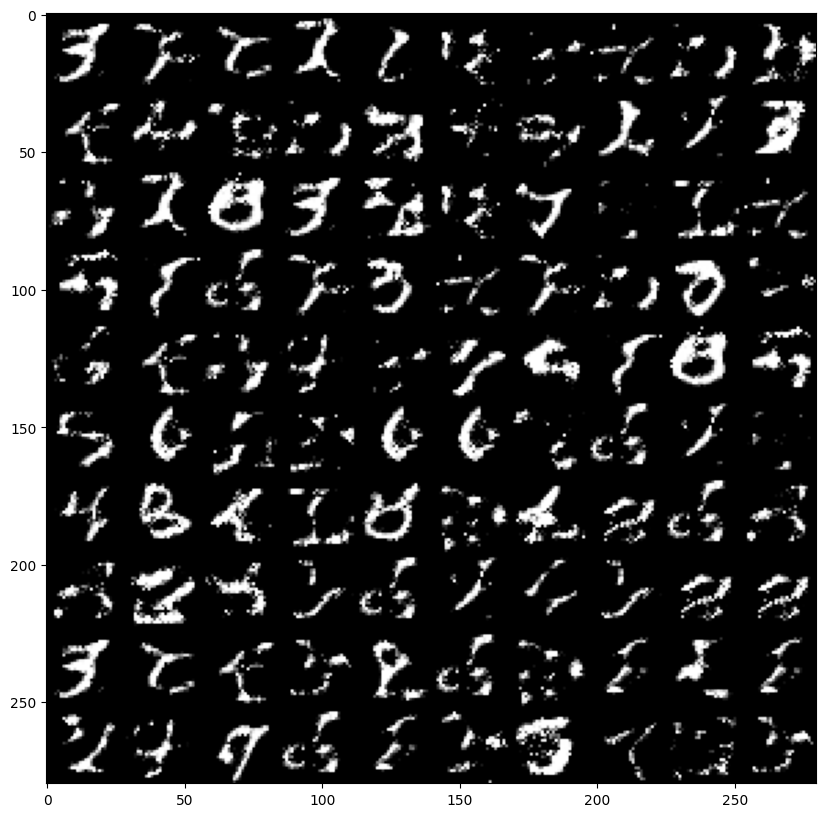

In [8]:
# Test decoder
num_samples = 100
output = dec.predict(np.random.normal(size=(num_samples, 50)))
img = np.zeros(shape=(num_samples, 1, 28, 28))
for index in range(num_samples):
    m = output[index, :, :, :n_components]
    invs = output[index, :, :, n_components:2*n_components]
    logit_weights = output[index, :, :, 2*n_components:3*n_components]
    weights = softmax(logit_weights[:, :, :], axis=-1)
    
    # Compute pixel distribution and sample
    pvals = compute_mixture(m, invs, weights, n_components)
    for i in range(img[0].shape[1]):
        for j in range(img[0].shape[1]):
            ps = pvals[i, j, :] + 1e-6
            ps /= np.sum(ps)
            img[index, 0, i, j] = np.argmax(np.random.multinomial(1, ps))
            
display_digits(img)

In [9]:
# Test encoder
output = enc.predict(x_test[10:11, :, :])
mean = output[0]
log_var = output[1]
print(mean.shape, log_var.shape)
print(mean[0, :5])
print(log_var[0, :5])

1/1 [==============================] - 0s 225ms/step
(1, 50) (1, 50)
[-0.01989661  0.13407391 -0.04524967 -0.511063   -0.12159728]
[-8.2072525 -5.9756227 -8.666011  -7.002943  -9.262506 ]
